# **Logistic Regression Walkthrough**

End-to-end training pipeline:
data split, scaling, optimization, and evaluation.

In [1]:
import sys
import os

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, "..")) 

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

from src.model import LogisticRegression
from src.preprocessing import StandardScaler
from src.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from src.plotting import handle_plot

In [3]:
data = load_breast_cancer()

X = data.data
y = data.target

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (569, 30)
Labels shape: (569,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Scaling is performed after train-test split to prevent information leakage.**

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model is trained using batch gradient descent.**

**Loss values are stored for convergence analysis.**

In [6]:
model = LogisticRegression(
    learning_rate=0.1,
    n_iters=1000
)

model.fit(X_train_scaled, y_train)

Epoch 0 || Loss: 0.693147
Epoch 100 || Loss: 0.098281
Epoch 200 || Loss: 0.080073
Epoch 300 || Loss: 0.072221
Epoch 400 || Loss: 0.067596
Epoch 500 || Loss: 0.064452
Epoch 600 || Loss: 0.062130
Epoch 700 || Loss: 0.060320
Epoch 800 || Loss: 0.058856
Epoch 900 || Loss: 0.057638


In [7]:
SAVE_PLOTS = False

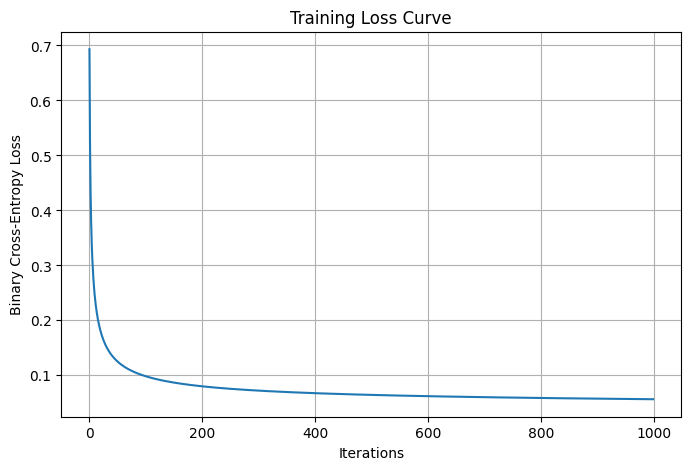

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.grid(True)

handle_plot(
    filename="loss_curve.png",
    save_plots=SAVE_PLOTS
)

**Predictions are generated from probabilities using the default threshold of 0.5.**

In [9]:
y_pred = model.predict(X_test_scaled, threshold=0.5)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tp, tn, fp, fn = confusion_matrix(y_test, y_pred)

print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

print("\nConfusion Matrix")
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

Accuracy  : 0.9737
Precision : 0.9859
Recall    : 0.9722
F1 Score  : 0.9790

Confusion Matrix
TP: 70, TN: 41, FP: 1, FN: 2


In [10]:
sk_model = SklearnLogisticRegression(max_iter=1000)
sk_model.fit(X_train_scaled, y_train)

sk_preds = sk_model.predict(X_test_scaled)

print("Sklearn Accuracy:", accuracy_score(y_test, sk_preds))

Sklearn Accuracy: 0.9824561403508771


## **Inspecting Learned Coefficients**

Since logistic regression is a linear model, each weight corresponds directly
to a feature's contribution to the log-odds.

Sorting coefficients by absolute value helps identify which features
have the strongest influence on predictions.


**Note:** Sign indicates direction of influence, magnitude indicates strength.


In [13]:
coef = pd.Series(model.weights, index=data.feature_names)
coef = coef.reindex(coef.abs().sort_values(ascending=False).index)
coef.head(10)

worst texture          -0.984333
worst radius           -0.858911
worst concave points   -0.837754
worst area             -0.828676
radius error           -0.804761
worst perimeter        -0.776138
worst smoothness       -0.734467
worst symmetry         -0.730883
mean texture           -0.729648
area error             -0.705917
dtype: float64

**NOTE: The model converges smoothly and matches expected logistic regression behavior.**